# RocketPy Simulation
This notebook was generated using Rocket-Serializer, a RocketPy tool to convert simulation files to RocketPy simulations
The notebook was generated using the following parameters file: `.\OUT\parameters.json`


In [61]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, TrapezoidalFins, NoseCone, Tail, Parachute
import datetime


## Environment


In [62]:
env = Environment()
env.set_location(latitude=43.21670, longitude=-0.04737)
env.set_elevation(0.0)


Optionally, you can set the date and atmospheric model


In [63]:
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))
# env.set_atmospheric_model(type='Forecast', file='GFS')


Gravity Details

Acceleration of gravity at surface level:    9.7803 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5379 m/s²


Launch Site Details

Launch Date: 2025-03-05 12:00:00 UTC
Launch Site Latitude: 43.21670°
Launch Site Longitude: -0.04737°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 0.0 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 1013.25 hPa
Surface Temperature: 288.15 K
Surface Air Density: 1.225 kg/m³
Surface Speed of Sound: 340.29 m/s


Earth Model Details

Earth Radius at Launch site: 6378.14 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034



Gravity Model Plots


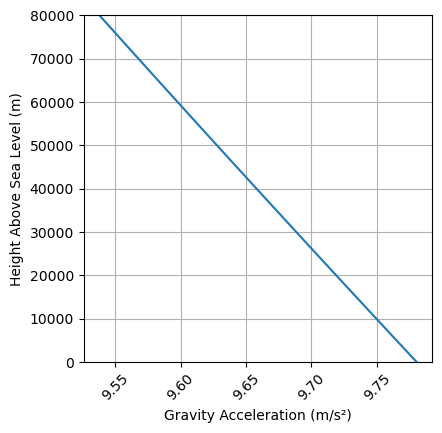



Atmospheric Model Plots


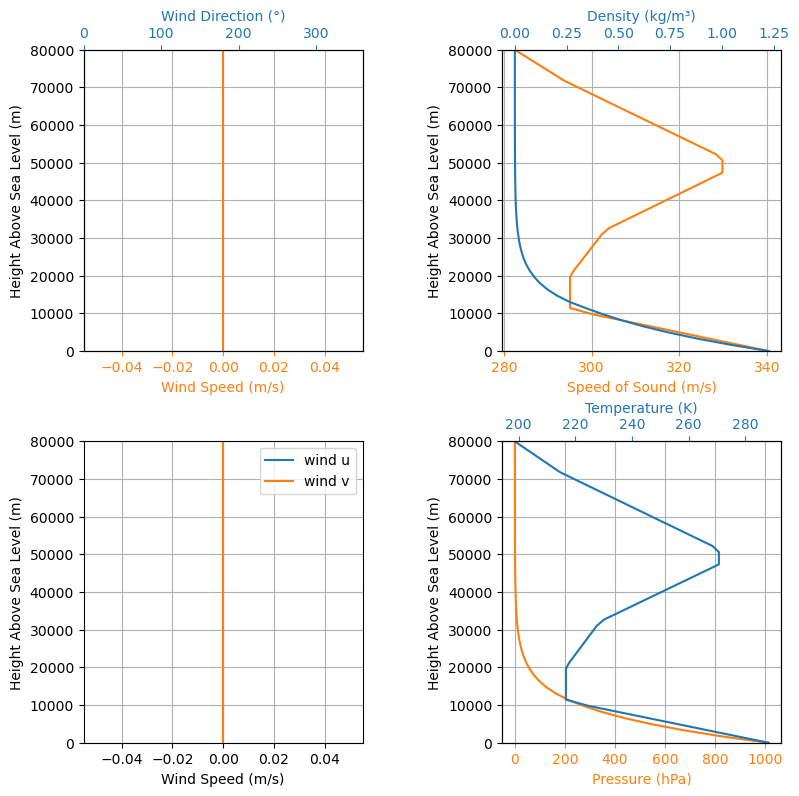

In [64]:
env.all_info()


## Motor
Currently, only Solid Motors are supported by Rocket-Serializer. If you want to use a Liquid/Hybrid motor, please use rocketpy directly.


In [65]:
motor = SolidMotor(
    thrust_source='thrust_source.csv',
    dry_mass=0,
    center_of_dry_mass_position=0,
    dry_inertia=[0, 0, 0],
    grains_center_of_mass_position=0,
    grain_number=1,
    grain_density=1413.6730470616137,
    grain_outer_radius=0.027,
    grain_initial_inner_radius=0.0135,
    grain_initial_height=0.404,
    grain_separation=0,
    nozzle_radius=0.02025,
    nozzle_position=-0.202,
    throat_radius=0.0135,
    reshape_thrust_curve=False,  # Not implemented in Rocket-Serializer
    interpolation_method='linear',
    coordinate_system_orientation='nozzle_to_combustion_chamber',
)


Nozzle Details
Nozzle Radius: 0.02025 m
Nozzle Throat Radius: 0.0135 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1413.6730470616137 kg/m3
Grain Outer Radius: 0.027 m
Grain Inner Radius: 0.0135 m
Grain Height: 0.404 m
Grain Volume: 0.001 m3
Grain Mass: 0.981 kg

Motor Details
Total Burning Time: 1.69 s
Total Propellant Mass: 0.981 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 2066.558 m/s
Average Thrust: 1199.582 N
Maximum Thrust: 1347.218 N at 0.03 s after ignition.
Total Impulse: 2027.293 Ns



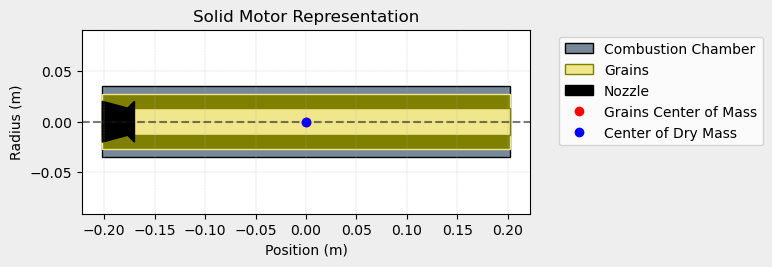

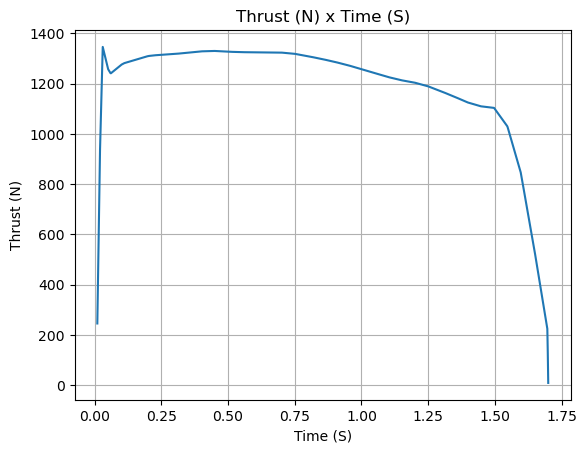

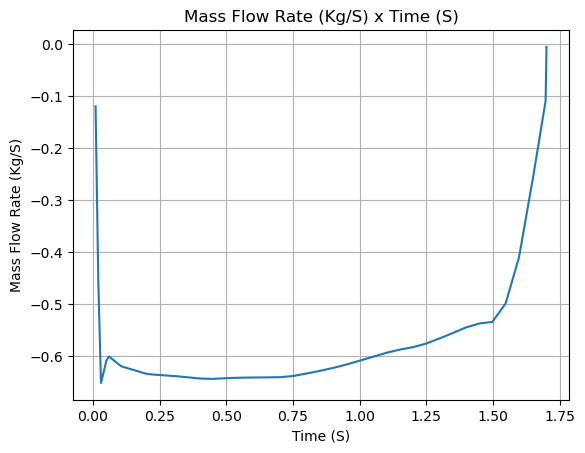

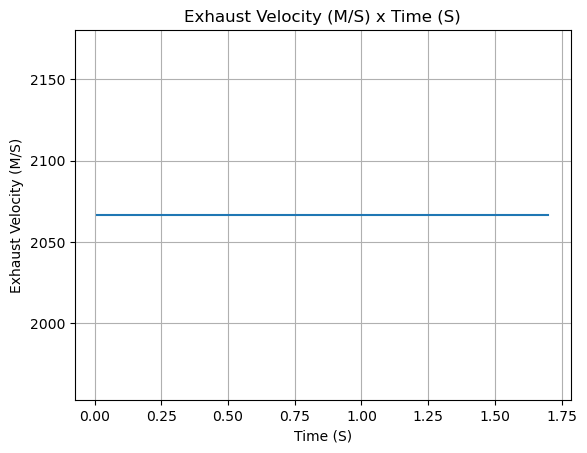

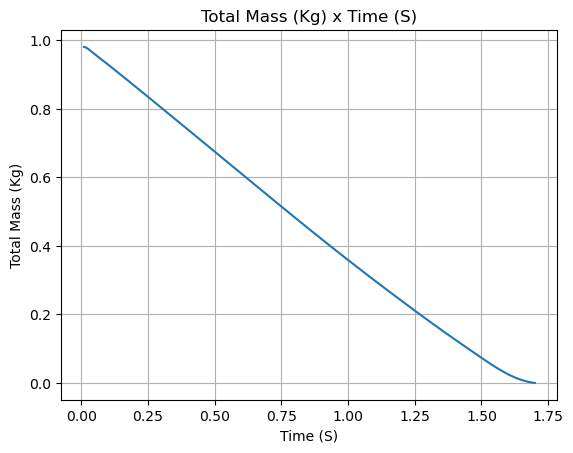

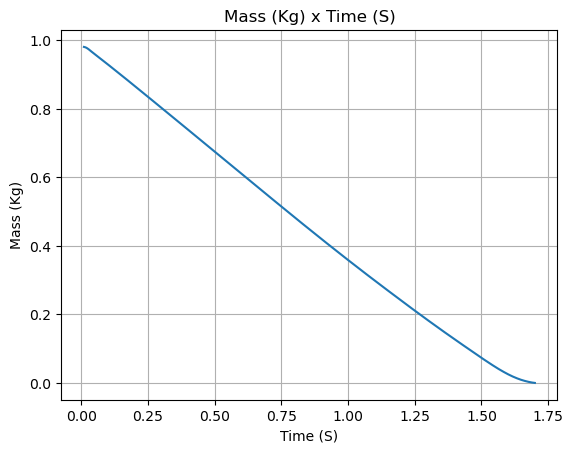

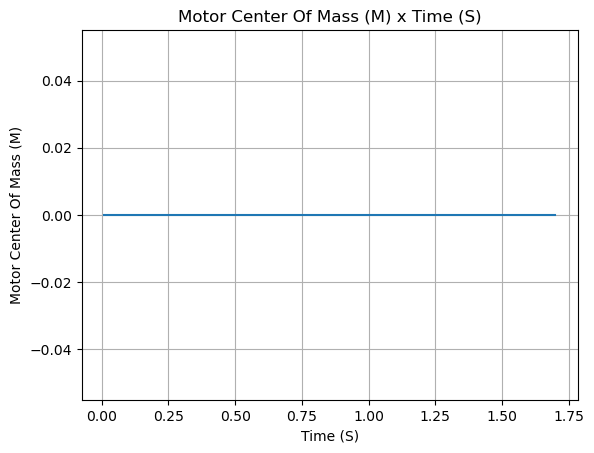

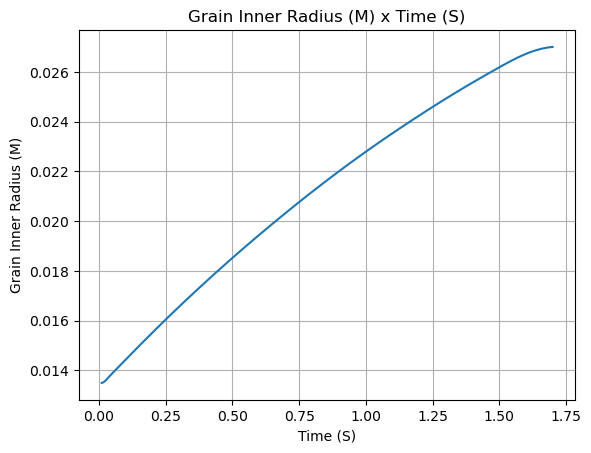

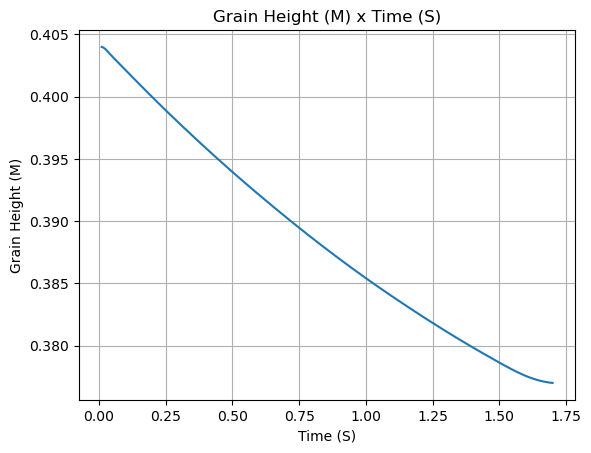

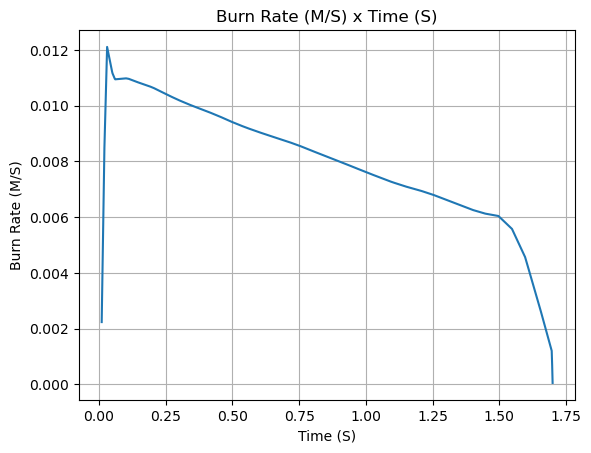

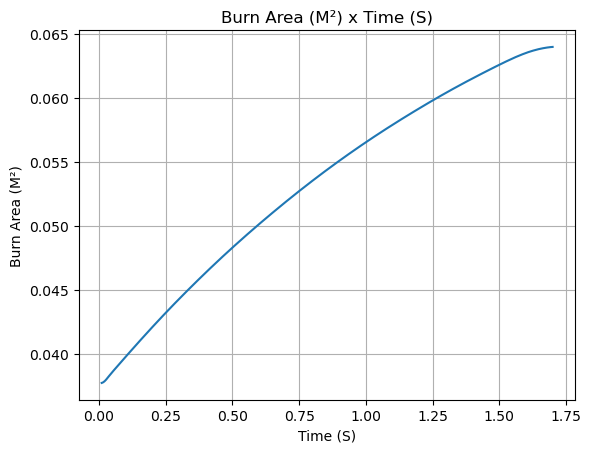

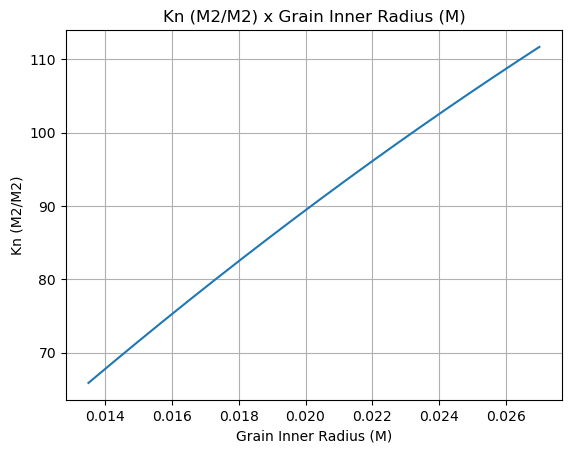

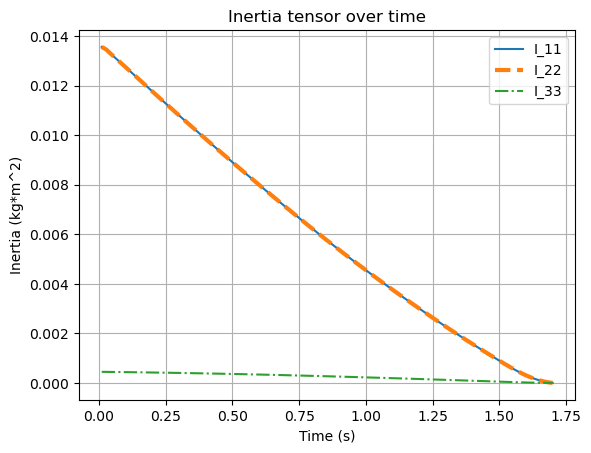

In [66]:
motor.all_info()


## Rocket
Currently, only single stage rockets are supported by Rocket-Serializer
We will start by defining the aerodynamic surfaces, and then build the rocket.


### Nosecones


In [67]:
nosecone = NoseCone(
    length=0.035,
    kind='elliptical',
    base_radius=0.045,
    rocket_radius=0.045,
    name='Ogive',
)

### Fins
As rocketpy allows for multiple fins sets, we will create a dictionary with all the fins sets and then add them to the rocket


In [68]:
trapezoidal_fins = {}
trapezoidal_fins[0] = TrapezoidalFins(
    n=4,
    root_chord=0.3,
    tip_chord=0.15,
    span=0.128,
    cant_angle=0.0,
    sweep_length= 0.075,
    sweep_angle= None,
    rocket_radius=0.05,
    name='Ailerons Trapézoïdaux',
)

### Transitions (Tails)
As rocketpy allows for multiple tails, we will create a dictionary with all the tails and then add them to the rocket


In [69]:
tails = {}
tails[0] = Tail(
    top_radius=0.045,
    bottom_radius=0.05,
    length=0.15,
    rocket_radius=0.05,
    name='Transition',
)

### Parachutes
As rocketpy allows for multiple parachutes, we will create a dictionary with all the parachutes and then add them to the rocket


In [70]:
parachutes = {}
parachutes[0] = Parachute(
    name='Parachute',
    cd_s=1.6,
    trigger='apogee',
    sampling_rate=100, 
)

In [71]:
rocket = Rocket(
    radius=0.05,
    mass=8.019,
    inertia=[0.017, 0.017, 3.09],
    power_off_drag='drag_curve.csv',
    power_on_drag='drag_curve.csv',
    center_of_mass_without_motor=1.102,
    coordinate_system_orientation='nose_to_tail',
)

### Adding surfaces to the rocket
Now that we have all the surfaces, we can add them to the rocket


In [72]:
rocket.add_surfaces(surfaces=[nosecone, trapezoidal_fins[0], tails[0]], positions=[0.0, 1.885, 0.035])

In [73]:
rocket.add_motor(motor, position=1.993) 


Adding parachutes to the rocket


In [74]:
rocket.parachutes = list(parachutes.values())



Inertia Details

Rocket Mass: 8.019 kg (without motor)
Rocket Dry Mass: 8.019 kg (with unloaded motor)
Rocket Loaded Mass: 9.000 kg
Rocket Structural Mass Ratio: 0.891
Rocket Inertia (with unloaded motor) 11: 0.017 kg*m2
Rocket Inertia (with unloaded motor) 22: 0.017 kg*m2
Rocket Inertia (with unloaded motor) 33: 3.090 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.05 m
Rocket Frontal Area: 0.007854 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.093 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.891 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.097 m


Aerodynamics Lift Coefficient Derivatives

Ogive Lift Coefficient Derivative: 1.620/rad
Ailerons Trapézoïdaux Lift Coefficient Derivative: 15.614/rad
Transition Lift

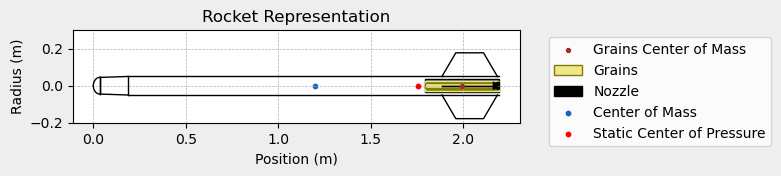


Mass Plots
----------------------------------------


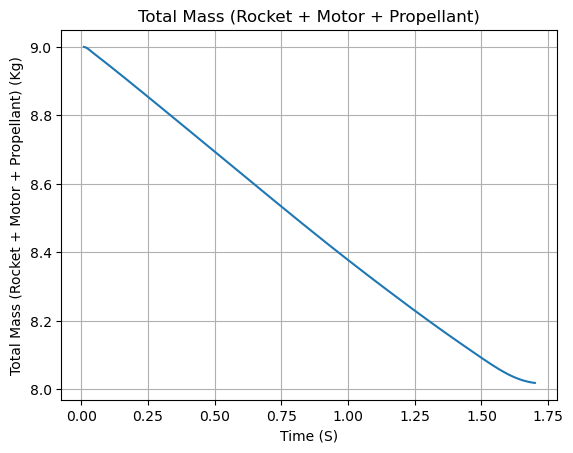

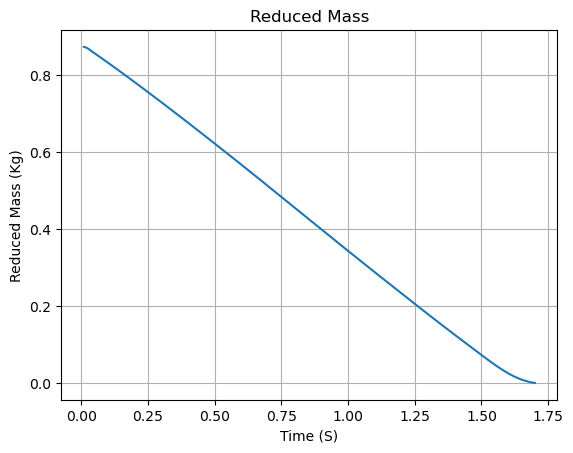


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


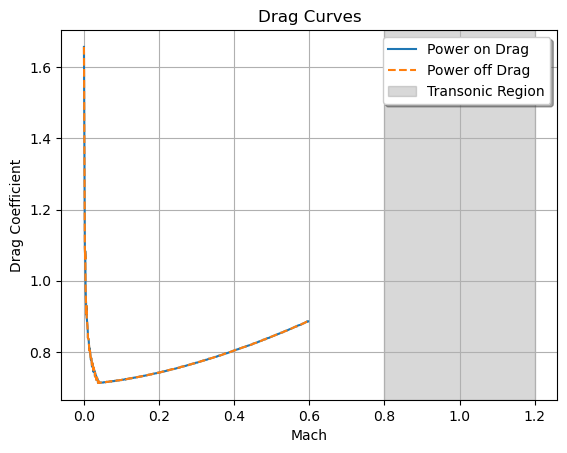


Stability Plots
--------------------


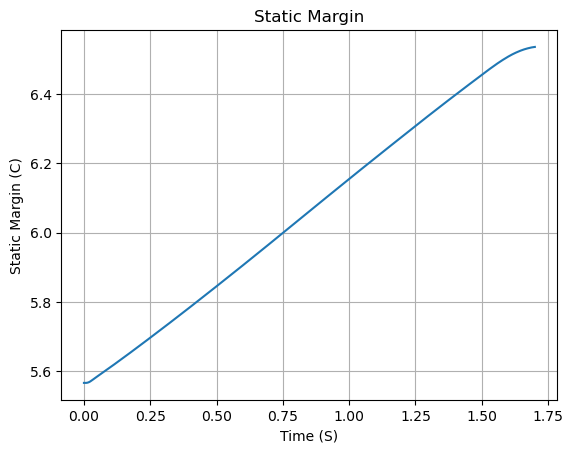

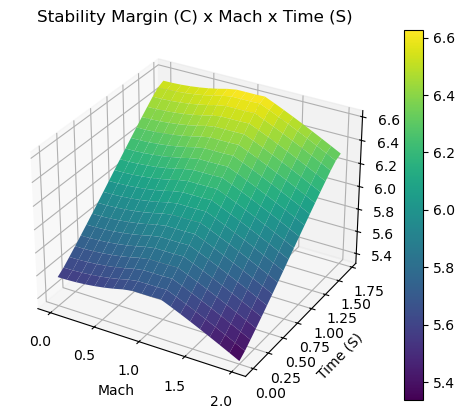


Thrust-to-Weight Plot
----------------------------------------


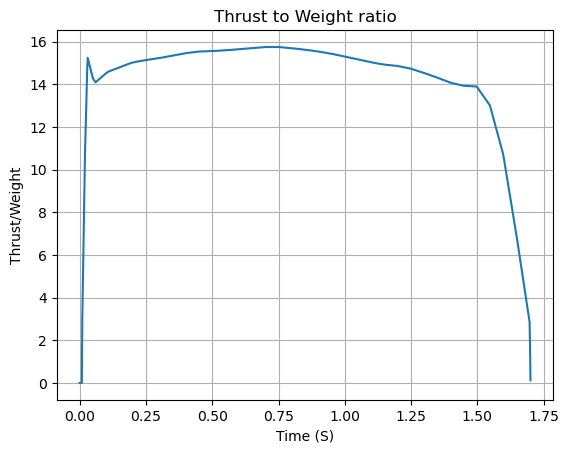

In [75]:
### Rocket Info
rocket.all_info()


## Flight
We will now create the flight simulation. Let's go!


In [76]:
flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=2.0,
    inclination=80.0,
    heading=90.0,
    terminate_on_apogee=False,
    max_time=600,
)


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 0.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.704 | e1: -0.062 | e2: 0.062 | e3: -0.704
Euler Angles - Spin φ : 0.00° | Nutation θ: -10.00° | Precession ψ: -90.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 5.566 c


Surface Wind Conditions

Frontal Surface Wind Speed: 0.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


Launch Rail

Launch Rail Length: 2.0 m
Launch Rail Inclination: 80.00°
Launch Rail Heading: 90.00°


Rail Departure State

Rail Departure Time: 0.190 s
Rail Departure Velocity: 23.178 m/s
Rail Departure Stability Margin: 5.663 c
Rail Departure Angle of Attack: 0.000°
Rail Departure Thrust-Weight Ratio: 14.987
Rail Departure Reynolds Number: 1.587e+05


Burn out State

Burn out time: 1.700 s
Altitude at burn out: 187.293 m (ASL) | 187.293 m (AGL)
Rocket speed at burn out: 208.476 m/s
Freestream veloc

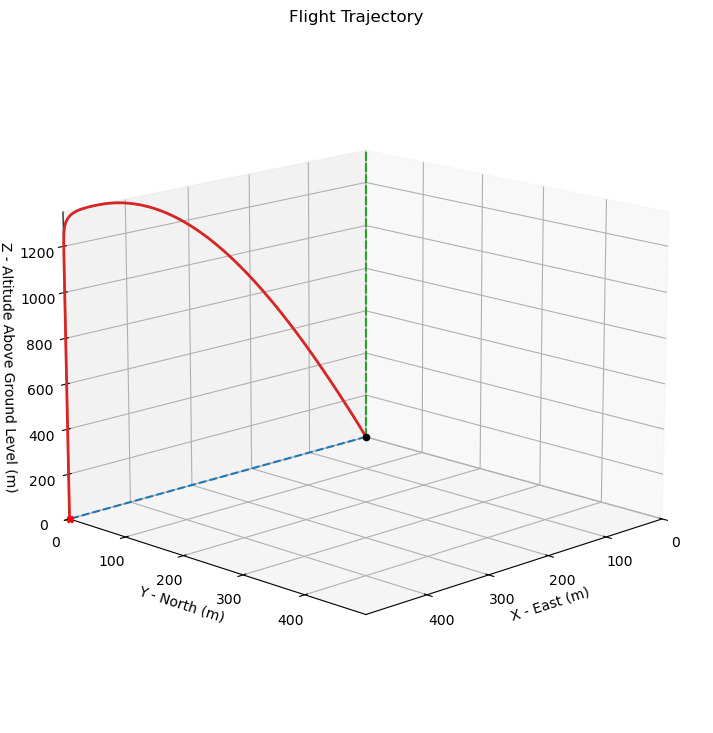



Trajectory Kinematic Plots



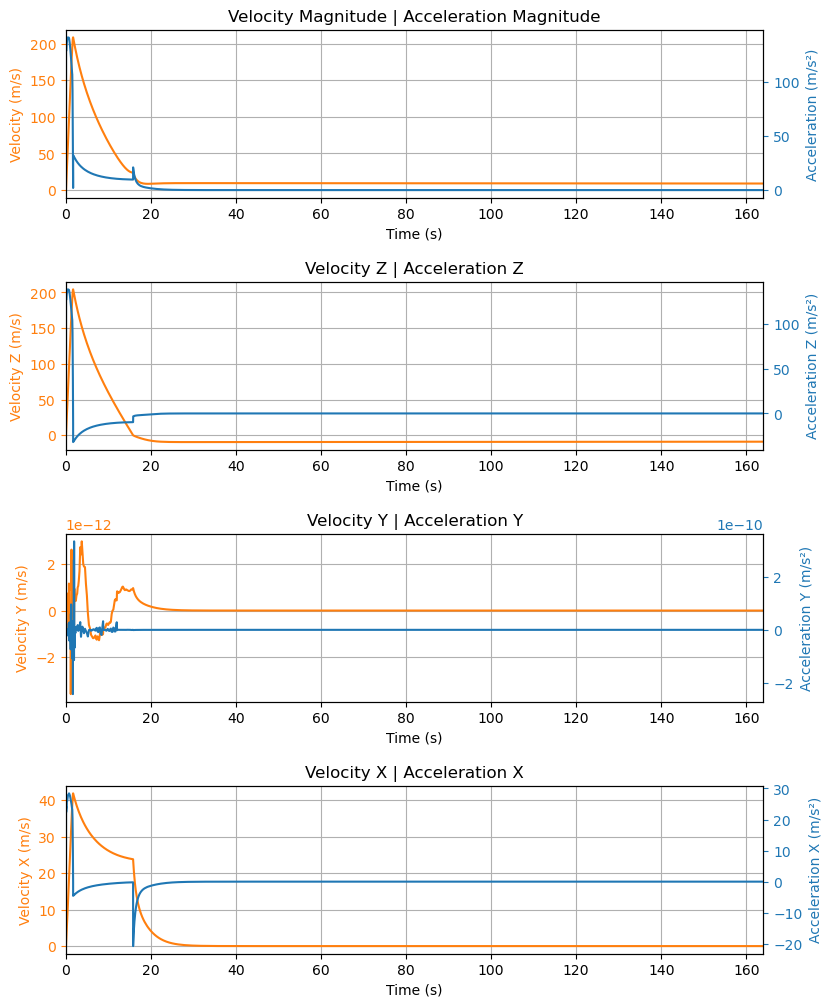



Angular Position Plots



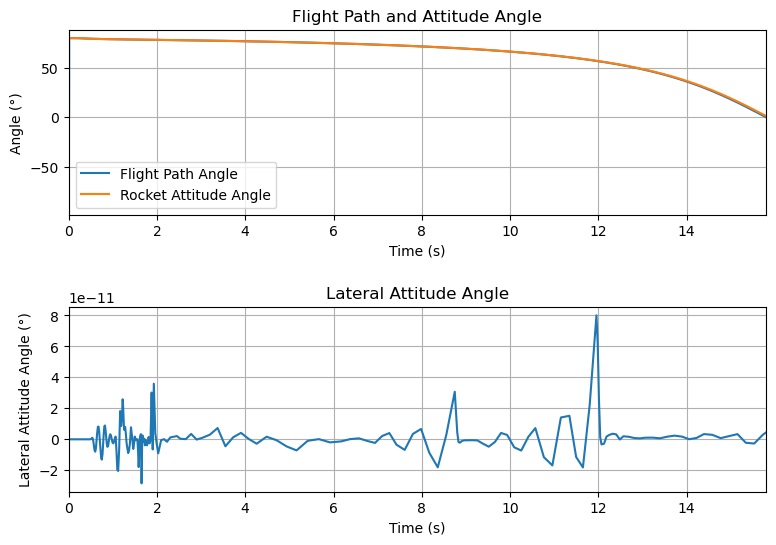



Path, Attitude and Lateral Attitude Angle plots



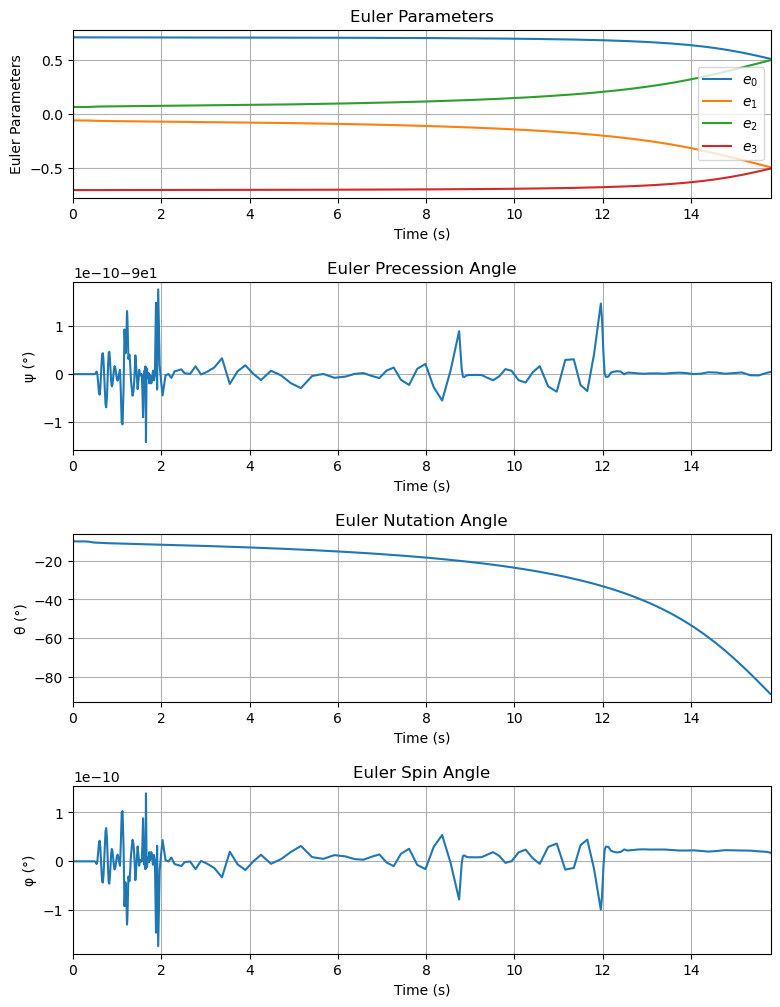



Trajectory Angular Velocity and Acceleration Plots



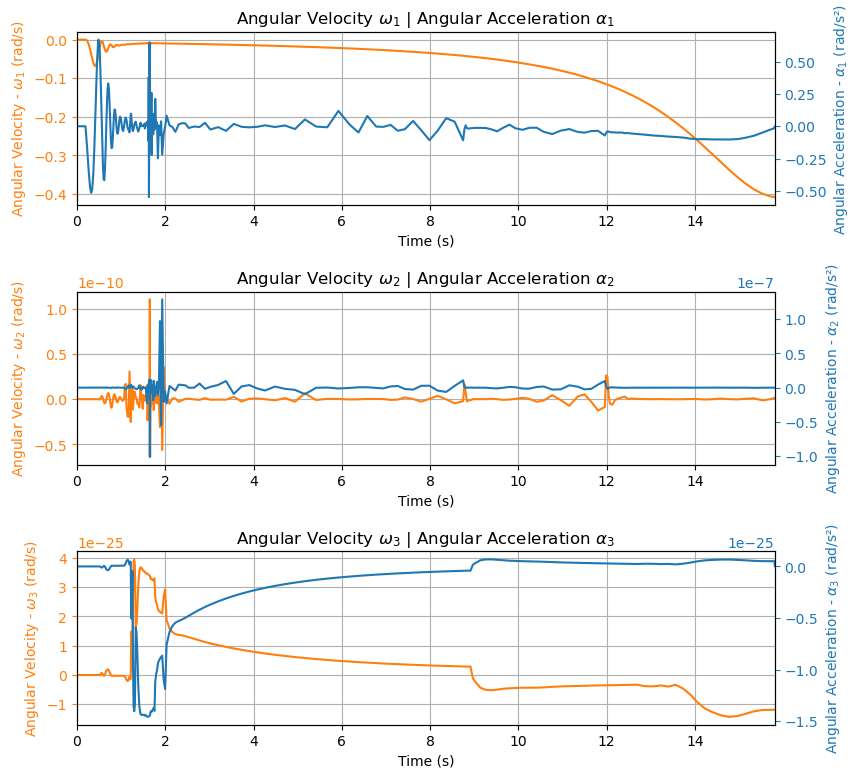



Aerodynamic Forces Plots



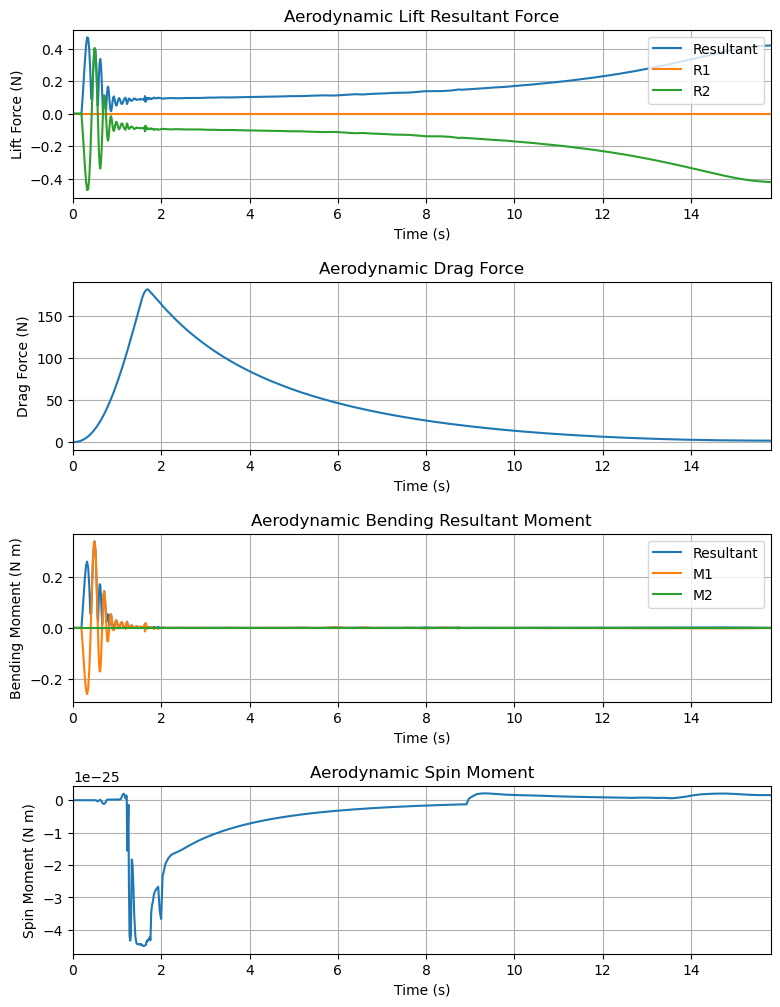



Rail Buttons Forces Plots

No rail buttons were defined. Skipping rail button plots.


Trajectory Energy Plots



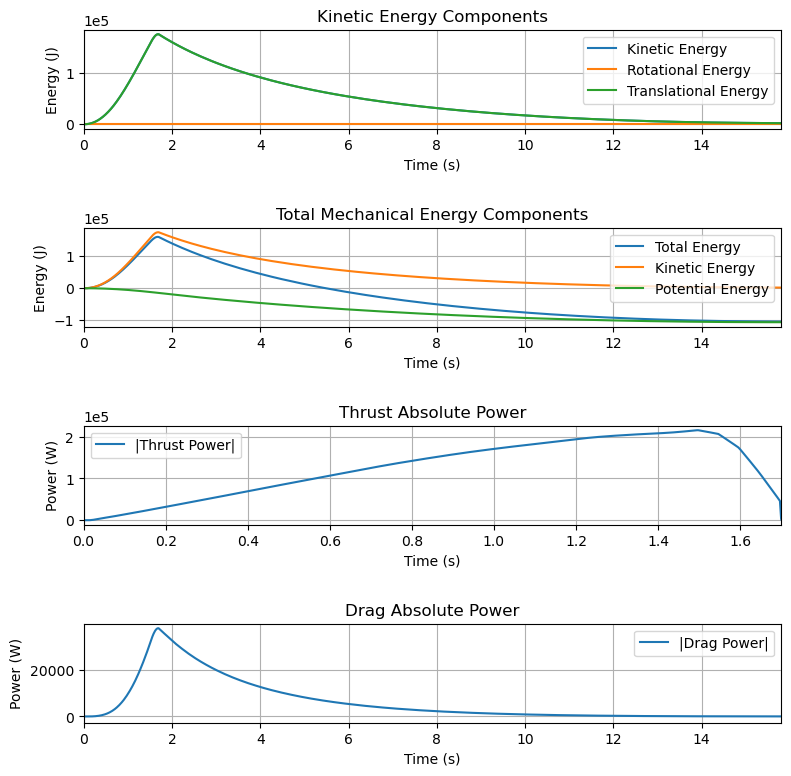



Trajectory Fluid Mechanics Plots



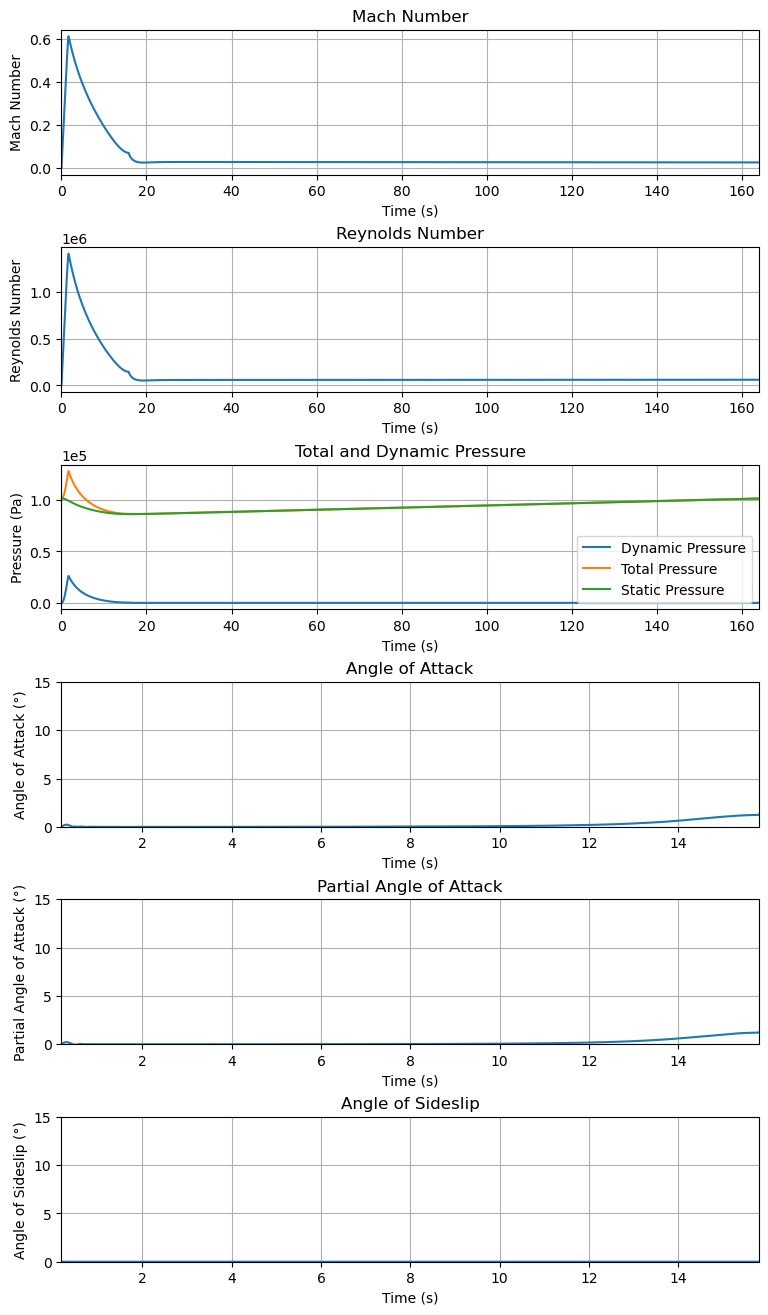



Trajectory Stability and Control Plots



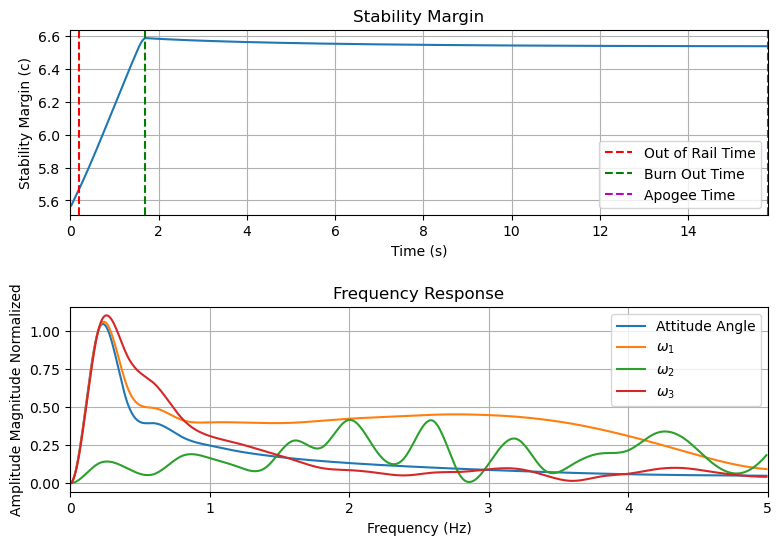



Rocket and Parachute Pressure Plots



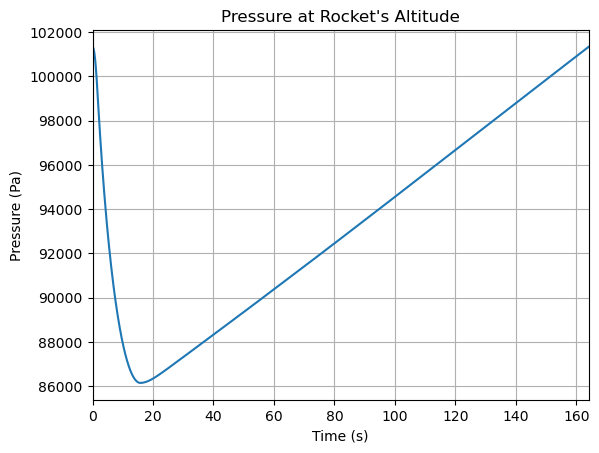


Parachute:  Parachute


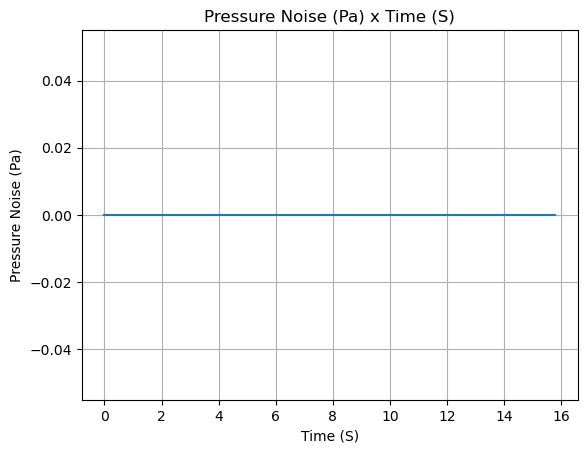

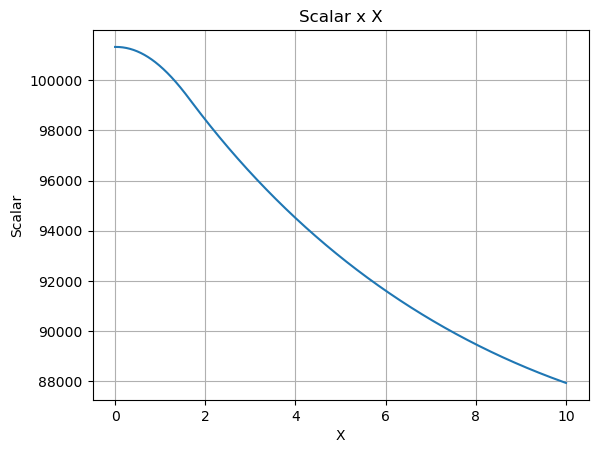

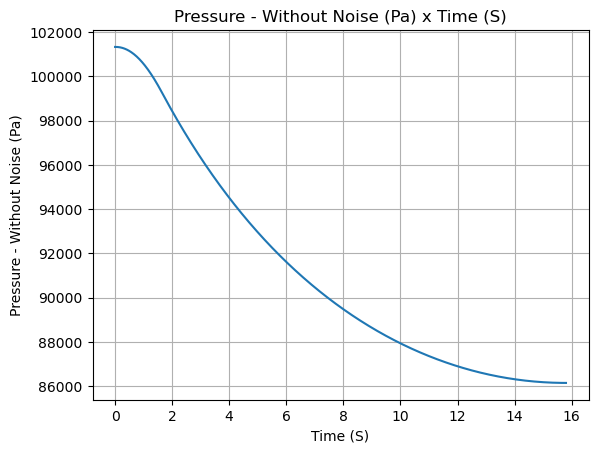

In [77]:
flight.all_info()


## Data export

In [78]:
flight.export_data("../../DATA/RocketPy-Simulation-SansVent.csv")

## Compare Results
We will now compare the results of the simulation with the parameters used to create it. Let's go!


In [79]:
### OpenRocket vs RocketPy Parameters
time_to_apogee_ork = 16.001
time_to_apogee_rpy = flight.apogee_time
print(f"Time to apogee (OpenRocket): {time_to_apogee_ork:.3f} s")
print(f"Time to apogee (RocketPy):   {time_to_apogee_rpy:.3f} s")
apogee_difference = time_to_apogee_rpy - time_to_apogee_ork
error = abs((apogee_difference)/time_to_apogee_rpy)*100
print(f"Time to apogee difference:   {error:.3f} %")
print()

flight_time_ork = 85.024
flight_time_rpy = flight.t_final
print(f"Flight time (OpenRocket): {flight_time_ork:.3f} s")
print(f"Flight time (RocketPy):   {flight_time_rpy:.3f} s")
flight_time_difference = flight_time_rpy - flight_time_ork
error_flight_time = abs((flight_time_difference)/flight_time_rpy)*100
print(f"Flight time difference:   {error_flight_time:.3f} %")
print()

ground_hit_velocity_ork = -20.059
ground_hit_velocity_rpy = flight.impact_velocity
print(f"Ground hit velocity (OpenRocket): {ground_hit_velocity_ork:.3f} m/s")
print(f"Ground hit velocity (RocketPy):   {ground_hit_velocity_rpy:.3f} m/s")
ground_hit_velocity_difference = ground_hit_velocity_rpy - ground_hit_velocity_ork
error_ground_hit_velocity = abs((ground_hit_velocity_difference)/ground_hit_velocity_rpy)*100
print(f"Ground hit velocity difference:   {error_ground_hit_velocity:.3f} %")
print()

launch_rod_velocity_ork = 23.643
launch_rod_velocity_rpy = flight.out_of_rail_velocity
print(f"Launch rod velocity (OpenRocket): {launch_rod_velocity_ork:.3f} m/s")
print(f"Launch rod velocity (RocketPy):   {launch_rod_velocity_rpy:.3f} m/s")
launch_rod_velocity_difference = launch_rod_velocity_rpy - launch_rod_velocity_ork
error_launch_rod_velocity = abs((launch_rod_velocity_difference)/launch_rod_velocity_rpy)*100
print(f"Launch rod velocity difference:   {error_launch_rod_velocity:.3f} %")
print()

max_acceleration_ork = 141.309
max_acceleration_rpy = flight.max_acceleration
print(f"Max acceleration (OpenRocket): {max_acceleration_ork:.3f} m/s²")
print(f"Max acceleration (RocketPy):   {max_acceleration_rpy:.3f} m/s²")
max_acceleration_difference = max_acceleration_rpy - max_acceleration_ork
error_max_acceleration = abs((max_acceleration_difference)/max_acceleration_rpy)*100
print(f"Max acceleration difference:   {error_max_acceleration:.3f} %")
print()

max_altitude_ork = 1396.913
max_altitude_rpy = flight.apogee - flight.env.elevation
print(f"Max altitude (OpenRocket): {max_altitude_ork:.3f} m")
print(f"Max altitude (RocketPy):   {max_altitude_rpy:.3f} m")
max_altitude_difference = max_altitude_rpy - max_altitude_ork
error_max_altitude = abs((max_altitude_difference)/max_altitude_rpy)*100
print(f"Max altitude difference:   {error_max_altitude:.3f} %")
print()

max_mach_ork = 0.597
max_mach_rpy = flight.max_mach_number 
print(f"Max Mach (OpenRocket): {max_mach_ork:.3f}")
print(f"Max Mach (RocketPy):   {max_mach_rpy:.3f}")
max_mach_difference = max_mach_rpy - max_mach_ork
error_max_mach = abs((max_mach_difference)/max_mach_rpy)*100
print(f"Max Mach difference:   {error_max_mach:.3f} %")
print()

max_velocity_ork = 206.389
max_velocity_rpy = flight.max_speed
print(f"Max velocity (OpenRocket): {max_velocity_ork:.3f} m/s")
print(f"Max velocity (RocketPy):   {max_velocity_rpy:.3f} m/s")
max_velocity_difference = max_velocity_rpy - max_velocity_ork
error_max_velocity = abs((max_velocity_difference)/max_velocity_rpy)*100
print(f"Max velocity difference:   {error_max_velocity:.3f} %")
print()

max_thrust_ork = 1347.218
max_thrust_rpy = flight.rocket.motor.thrust.max
print(f"Max thrust (OpenRocket): {max_thrust_ork:.3f} N")
print(f"Max thrust (RocketPy):   {max_thrust_rpy:.3f} N")
max_thrust_difference = max_thrust_rpy - max_thrust_ork
error_max_thrust = abs((max_thrust_difference)/max_thrust_rpy)*100
print(f"Max thrust difference:   {error_max_thrust:.3f} %")
print()

burnout_stability_margin_ork = 6.756
burnout_stability_margin_rpy = flight.stability_margin(flight.rocket.motor.burn_out_time)
print(f"Burnout stability margin (OpenRocket): {burnout_stability_margin_ork:.3f}")
print(f"Burnout stability margin (RocketPy):   {burnout_stability_margin_rpy:.3f}")
burnout_stability_margin_difference = burnout_stability_margin_rpy - burnout_stability_margin_ork
error_burnout_stability_margin = abs((burnout_stability_margin_difference)/burnout_stability_margin_rpy)*100
print(f"Burnout stability margin difference:   {error_burnout_stability_margin:.3f} %")
print()

max_stability_margin_ork = 6.774
max_stability_margin_rpy = flight.max_stability_margin
print(f"Max stability margin (OpenRocket): {max_stability_margin_ork:.3f}")
print(f"Max stability margin (RocketPy):   {max_stability_margin_rpy:.3f}")
max_stability_margin_difference = max_stability_margin_rpy - max_stability_margin_ork
error_max_stability_margin = abs((max_stability_margin_difference)/max_stability_margin_rpy)*100
print(f"Max stability margin difference:   {error_max_stability_margin:.3f} %")
print()

min_stability_margin_ork = 5.775
min_stability_margin_rpy = flight.min_stability_margin
print(f"Min stability margin (OpenRocket): {min_stability_margin_ork:.3f}")
print(f"Min stability margin (RocketPy):   {min_stability_margin_rpy:.3f}")
min_stability_margin_difference = min_stability_margin_rpy - min_stability_margin_ork
error_min_stability_margin = abs((min_stability_margin_difference)/min_stability_margin_rpy)*100
print(f"Min stability margin difference:   {error_min_stability_margin:.3f} %")
print()



Time to apogee (OpenRocket): 16.001 s
Time to apogee (RocketPy):   15.798 s
Time to apogee difference:   1.282 %

Flight time (OpenRocket): 85.024 s
Flight time (RocketPy):   164.022 s
Flight time difference:   48.163 %

Ground hit velocity (OpenRocket): -20.059 m/s
Ground hit velocity (RocketPy):   -8.960 m/s
Ground hit velocity difference:   123.865 %

Launch rod velocity (OpenRocket): 23.643 m/s
Launch rod velocity (RocketPy):   23.178 m/s
Launch rod velocity difference:   2.006 %

Max acceleration (OpenRocket): 141.309 m/s²
Max acceleration (RocketPy):   141.345 m/s²
Max acceleration difference:   0.025 %

Max altitude (OpenRocket): 1396.913 m
Max altitude (RocketPy):   1347.625 m
Max altitude difference:   3.657 %

Max Mach (OpenRocket): 0.597
Max Mach (RocketPy):   0.614
Max Mach difference:   2.792 %

Max velocity (OpenRocket): 206.389 m/s
Max velocity (RocketPy):   208.523 m/s
Max velocity difference:   1.024 %

Max thrust (OpenRocket): 1347.218 N
Max thrust (RocketPy):   1347.